# SUSTAINABLE INCOME GROWTH RATE

Through our analysis of Household Economic Data of Canadaian households over the past 2 Decades, We made an attempt to define and estimate **Sustainable Income Growth Rate** , an annual rate at which a typical household should expect its income to grow given an anticipated rate of Inflation and historical trends of change in disposable income and household consumption expenditure.  

## HOUSEHOLD ECONOMIC DATA : ANALYSIS OF INCOME, INFLATION AND EXPENDITURE

### Analysing historical trends in Disposable Income and Consumption Expenditure

In [153]:
# Import necessary libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import os

In [154]:
household_df = pd.read_csv("./Resources/canada_household_econimic_data.csv", index_col = 'Income, consumption and savings')
display(household_df.head())
display(household_df.tail())

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
"Income, consumption and savings",,,,,,,,,,,,,,,,,,,,,
Household disposable income,"615,286","642,584","663,239","695,238","721,510","774,375","816,321","862,404","884,783","928,091",...,"1,046,791","1,081,654","1,129,875","1,132,763","1,189,366","1,224,919","1,280,362","1,387,360","1,444,569","1,520,693"
Compensation of employees,"574,278","596,782","620,600","656,154","692,609","737,321","782,564","818,108","810,556","835,940",...,"959,181","996,247","1,024,742","1,024,142","1,066,523","1,122,304","1,168,597","1,155,842","1,264,592","1,383,129"
Net mixed income,"107,636","111,748","116,533","122,301","125,661","131,002","138,842","143,917","144,671","151,130",...,"167,712","172,078","177,994","183,581","190,323","195,618","207,999","207,211","217,267","237,720"
Property income received,"116,942","109,346","108,675","113,209","122,970","137,105","153,667","160,013","152,106","152,519",...,"175,342","181,876","198,218","189,502","202,189","202,278","217,587","212,221","215,883","241,202"
Less: property income paid,"41,204","37,300","39,081","40,156","43,309","52,632","61,313","63,921","55,559","54,143",...,"56,232","55,857","56,033","56,405","60,186","70,213","79,808","72,579","66,922","85,866"


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
"Income, consumption and savings",,,,,,,,,,,,,,,,,,,,,
Social transfers in kind (STiK): health,"73,275","77,820","83,061","86,672","90,590","96,801","104,198","111,759","118,734","124,275",...,"139,633","144,998","150,809","155,903","161,159","165,903","172,933","185,450","210,157","227,467"
Social transfers in kind (STiK): other,"32,556","35,055","36,580","37,853","40,287","42,756","44,656","48,565","48,630","49,302",...,"54,285","54,591","56,784","59,697","62,117","65,927","68,847","70,937","71,786","79,088"
Household actual final consumption,"775,366","821,301","860,010","899,394","948,698","1,004,073","1,063,632","1,115,820","1,129,735","1,183,964",...,"1,323,036","1,379,357","1,424,887","1,466,550","1,533,668","1,597,406","1,650,671","1,597,233","1,724,190","1,898,803"
Change in pension entitlements,"29,643","29,444","32,376","35,213","41,620","39,979","43,385","45,397","38,057","38,076",...,"44,876","46,439","43,260","43,138","43,728","43,259","47,476","39,000","41,658","41,660"
Household net saving,"29,749","20,423","14,409","17,511","10,716","20,714","17,683","29,296","41,148","39,451",...,"53,583","41,838","51,055","22,235","23,941","7,733","27,022","198,463","158,591","92,683"


In [155]:
household_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Household disposable income to Household net saving
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2001    33 non-null     object
 1   2002    33 non-null     object
 2   2003    33 non-null     object
 3   2004    33 non-null     object
 4   2005    33 non-null     object
 5   2006    33 non-null     object
 6   2007    33 non-null     object
 7   2008    33 non-null     object
 8   2009    33 non-null     object
 9   2010    33 non-null     object
 10  2011    33 non-null     object
 11  2012    33 non-null     object
 12  2013    33 non-null     object
 13  2014    33 non-null     object
 14  2015    33 non-null     object
 15  2016    33 non-null     object
 16  2017    33 non-null     object
 17  2018    33 non-null     object
 18  2019    33 non-null     object
 19  2020    33 non-null     object
 20  2021    33 non-null     object
 21  2022    33 non-null     o

In [156]:
# Selecting Household Consumption and Net Savings Data from full data for Analysis

economic_data_df = household_df.transpose().drop(columns=['Household disposable income',
                                                       'Compensation of employees',
                                                       'Net mixed income', 'Property income received',
                                                       'Less: property income paid',
                                                       'Current transfers received',
                                                       'Less: current transfers paid',
                                                       'Social transfers in kind (STiK)',
                                                       'Social transfers in kind (STiK): education',
                                                        'Social transfers in kind (STiK): health',
                                                        'Social transfers in kind (STiK): other',
                                                       'Household actual final consumption',
                                                       'Change in pension entitlements'], axis=1)


economic_data_df.head()

"Income, consumption and savings",Adjusted household disposable income,Household final consumption expenditure (HFCE),Food and non-alcoholic beverages,Alcoholic beverages and tobacco,Clothing and footwear,"Housing, water, electricity, gas and other fuels","Furnishings, household equipment and other goods and services related to the dwelling and property",Health,Transport,Communications,Recreation and culture,Education,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Household net saving
2001,"775,472","615,180","59,698","27,713","30,229","139,341","35,912","21,548","90,542","13,672","61,600","6,346","45,449","51,954","31,176","29,749"
2002,"812,280","651,605","62,227","31,002","31,099","145,400","38,516","23,418","97,163","15,134","64,807","6,936","47,042","55,832","33,029","20,423"
2003,"842,043","681,206","64,646","33,087","31,763","153,520","40,551","24,760","101,244","15,788","67,024","7,873","48,631","57,839","34,480","14,409"
2004,"881,692","712,940","67,044","34,003","32,559","160,413","42,785","26,646","105,296","16,811","69,501","8,326","50,961","62,240","36,355","17,511"
2005,"917,794","752,414","69,305","34,130","33,712","168,562","44,873","28,720","113,683","18,071","72,867","8,991","54,283","66,978","38,239","10,716"


In [157]:
# Define a function to remove commas and convert to float
def convert_to_float(value):
    return float(str(value).replace(',', ''))

# Apply conversion function to each specified column
for column in economic_data_df.columns:
    economic_data_df[column] = economic_data_df[column].apply(convert_to_float)

# Print the DataFrame with the updated columns
display(economic_data_df.head())

# Print the data types of the columns
economic_data_df.dtypes


"Income, consumption and savings",Adjusted household disposable income,Household final consumption expenditure (HFCE),Food and non-alcoholic beverages,Alcoholic beverages and tobacco,Clothing and footwear,"Housing, water, electricity, gas and other fuels","Furnishings, household equipment and other goods and services related to the dwelling and property",Health,Transport,Communications,Recreation and culture,Education,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Household net saving
2001,775472.0,615180.0,59698.0,27713.0,30229.0,139341.0,35912.0,21548.0,90542.0,13672.0,61600.0,6346.0,45449.0,51954.0,31176.0,29749.0
2002,812280.0,651605.0,62227.0,31002.0,31099.0,145400.0,38516.0,23418.0,97163.0,15134.0,64807.0,6936.0,47042.0,55832.0,33029.0,20423.0
2003,842043.0,681206.0,64646.0,33087.0,31763.0,153520.0,40551.0,24760.0,101244.0,15788.0,67024.0,7873.0,48631.0,57839.0,34480.0,14409.0
2004,881692.0,712940.0,67044.0,34003.0,32559.0,160413.0,42785.0,26646.0,105296.0,16811.0,69501.0,8326.0,50961.0,62240.0,36355.0,17511.0
2005,917794.0,752414.0,69305.0,34130.0,33712.0,168562.0,44873.0,28720.0,113683.0,18071.0,72867.0,8991.0,54283.0,66978.0,38239.0,10716.0


Income, consumption and savings
Adjusted household disposable income                                                                  float64
Household final consumption expenditure (HFCE)                                                        float64
Food and non-alcoholic beverages                                                                      float64
Alcoholic beverages and tobacco                                                                       float64
Clothing and footwear                                                                                 float64
Housing, water, electricity, gas and other fuels                                                      float64
Furnishings, household equipment and other goods and services related to the dwelling and property    float64
Health                                                                                                float64
Transport                                                                               

In [158]:
# Disposable Income, Total Consumption & Net Savings

economic_data_df.rename(columns={'Adjusted household disposable income':'Disposable_Income',
                               'Household final consumption expenditure (HFCE)': 'Total_Consumption',
                               'Household net saving':'Net_Savings'}, inplace=True)

economic_data_df.head()

"Income, consumption and savings",Disposable_Income,Total_Consumption,Food and non-alcoholic beverages,Alcoholic beverages and tobacco,Clothing and footwear,"Housing, water, electricity, gas and other fuels","Furnishings, household equipment and other goods and services related to the dwelling and property",Health,Transport,Communications,Recreation and culture,Education,"Food, beverage and accommodation services",Insurance and financial services,Miscellaneous goods and services,Net_Savings
2001,775472.0,615180.0,59698.0,27713.0,30229.0,139341.0,35912.0,21548.0,90542.0,13672.0,61600.0,6346.0,45449.0,51954.0,31176.0,29749.0
2002,812280.0,651605.0,62227.0,31002.0,31099.0,145400.0,38516.0,23418.0,97163.0,15134.0,64807.0,6936.0,47042.0,55832.0,33029.0,20423.0
2003,842043.0,681206.0,64646.0,33087.0,31763.0,153520.0,40551.0,24760.0,101244.0,15788.0,67024.0,7873.0,48631.0,57839.0,34480.0,14409.0
2004,881692.0,712940.0,67044.0,34003.0,32559.0,160413.0,42785.0,26646.0,105296.0,16811.0,69501.0,8326.0,50961.0,62240.0,36355.0,17511.0
2005,917794.0,752414.0,69305.0,34130.0,33712.0,168562.0,44873.0,28720.0,113683.0,18071.0,72867.0,8991.0,54283.0,66978.0,38239.0,10716.0


In [166]:
# Income Expenditure and Consumption

inc_exp_saving_df = economic_data_df[['Disposable_Income','Total_Consumption','Net_Savings']].reset_index()

inc_exp_saving_df.rename(columns={'index':'Year'},inplace=True)

inc_exp_saving_df = inc_exp_saving_df.set_index('Year')

display(inc_exp_saving_df.head())
display(inc_exp_saving_df.tail())

"Income, consumption and savings",Disposable_Income,Total_Consumption,Net_Savings
Year,,,
2001,775472.0,615180.0,29749.0
2002,812280.0,651605.0,20423.0
2003,842043.0,681206.0,14409.0
2004,881692.0,712940.0,17511.0
2005,917794.0,752414.0,10716.0


"Income, consumption and savings",Disposable_Income,Total_Consumption,Net_Savings
Year,,,
2018,1561880.0,1260445.0,7733.0
2019,1630217.0,1300816.0,27022.0
2020,1756696.0,1227897.0,198463.0
2021,1841123.0,1327636.0,158591.0
2022,1949826.0,1469670.0,92683.0


In [161]:
# Year-On-Year Change during 2001 to 2010 
inc_exp_saving_df.loc['2001':'2010'].diff().hvplot(kind='bar',rot=90, width = 700,
                                                  ylabel = 'Year-On-Year Change',
                                                  frame_width = 700, frame_height = 300,
                                                  title = 'YOY Change in Net Savings, Consumption and Income : 2001-2010')


:Bars   [Year,Income, consumption and savings]   (value)

In [163]:
#  Year-On-Year Change during 2010 to 2022 
inc_exp_saving_df.loc['2010':'2022'].diff().hvplot(kind='bar',rot=90, width = 700,
                                                  ylabel = 'Year-On-Year Change',yformatter = '%.0f',
                                                  frame_width = 700, frame_height = 300,
                                                  title = 'YOY Change in Net Savings, Consumption and Income : 2010-2022')


:Bars   [Year,Income, consumption and savings]   (value)

In [164]:
yoy_pct_change = round(inc_exp_saving_df.pct_change()*100,2)

display(yoy_pct_change.head())
display(yoy_pct_change.tail())

"Income, consumption and savings",Disposable_Income,Total_Consumption,Net_Savings
Year,,,
2001,NaN,NaN,NaN
2002,4.75,5.92,-31.35
2003,3.66,4.54,-29.45
2004,4.71,4.66,21.53
2005,4.09,5.54,-38.80


"Income, consumption and savings",Disposable_Income,Total_Consumption,Net_Savings
Year,,,
2018,3.17,4.24,-67.70
2019,4.38,3.20,249.44
2020,7.76,-5.61,634.45
2021,4.81,8.12,-20.09
2022,5.90,10.70,-41.56


Looking at Year-on-Year Change, while the disposable income has seen a near stable increase around 5% annually, only 6 Years in last 2 decades was there an increase in Household Net Savings and rest showing a decrease or insignificant increase. 2019 & 2020 being outliers attributable to COVID Situation. 

What this meant was the net savings which were at CAD 29749.0 million in 2001 came down to CAD 7733.00 million in 2018 and this negative trend seems to have returned more aggressively, owing to high levels of inflation, post COVID with decrerase in savings by around 20% in 2021 and 42% in 2022. All the while when household income has seen a stable growth.

This led to our inference that the income growth though stable is not sustainable, depleting the household savings.


## Understanding the impact of Inflation on the Household Economic Data

In [167]:
# Quarterly CPI Data

cpi_path = 'canada_CPI.csv'
cpi_df = pd.read_csv( cpi_path, skiprows=1)

cpi_df.head()

,date,INDINF_CPI_Q,INDINF_CPI_TRIM_Q,INDINF_CPI_MEDIAN_Q,INDINF_CPI_COMMON_Q
0,1993Q1,2.2,2.0,2.0,1.8
1,1993Q2,1.8,1.9,1.9,1.7
2,1993Q3,1.8,1.8,1.7,1.4
3,1993Q4,1.8,1.8,1.7,1.5
4,1994Q1,0.5,1.5,1.6,1.3


In [168]:
#formating dates by removing Q1, Q2, Q3 and Q4

cpi_df["date"] = [date.split('Q')[0] for date in cpi_df["date"]]

# changing column names
cpi_df.rename(columns = {'date':'Year','INDINF_CPI_MEDIAN_Q':'CPI_MEDIAN','INDINF_CPI_Q':'CPI_CORE',
                               'INDINF_CPI_TRIM_Q':'CPI_TRIM','INDINF_CPI_COMMON_Q':'CPI_COMMON'}, 
                     inplace = True)

#displaying the first five observations
cpi_df.head()

,Year,CPI_CORE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON
0,1993,2.2,2.0,2.0,1.8
1,1993,1.8,1.9,1.9,1.7
2,1993,1.8,1.8,1.7,1.4
3,1993,1.8,1.8,1.7,1.5
4,1994,0.5,1.5,1.6,1.3


In [172]:
# calculating approximate annual inflation as Mean of Quarterly CPI

cpi_annual_df = round(cpi_df.groupby('Year').mean(),2)

display(cpi_annual_df.tail())

cpi_annual_df.hvplot.area(title='Yearly Movement of Consumer Price Index', rot = 90,frame_width = 600,
                    frame_height = 300)

,CPI_CORE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON
Year,,,,
2019,1.95,2.02,1.95,2.15
2020,0.68,1.78,1.92,1.62
2021,3.42,2.88,2.70,2.55
2022,6.80,5.15,4.82,5.38
2023,4.17,4.17,4.40,5.33


:NdOverlay   [Variable]
   :Area   [Year]   (value,Baseline)

## Visualizing the impact of inflation on Total_Consumption & Disposable Income

In [174]:

# CPI_Common as measure of Inflation
inflation_plot = cpi_annual_df['CPI_COMMON'].loc['2001':'2022'].hvplot(kind='bar',rot = 90,
                                                                      frame_width = 700, frame_height = 300)

yoy_change_plot_1 = yoy_pct_change['Total_Consumption'].hvplot(kind='bar',rot = 90,
                                                              frame_width = 700, frame_height = 300,
                                                              title='Inflation and Yearly Change in Total_Consumption : 2001-2022')

yoy_change_plot_2 = yoy_pct_change['Disposable_Income'].hvplot(kind='bar',rot = 90,
                                                              frame_width = 700, frame_height = 300,
                                                              title='Inflation and Yearly Change in Disposable_Income : 2001-2022')

combined_plot = ((yoy_change_plot_1*inflation_plot)+(yoy_change_plot_2*inflation_plot)).cols(1)

combined_plot

:Layout
   .Overlay.I  :Overlay
      .Bars.Total_Consumption :Bars   [Year]   (Total_Consumption)
      .Bars.CPI_COMMON        :Bars   [Year]   (CPI_COMMON)
   .Overlay.II :Overlay
      .Bars.Disposable_Income :Bars   [Year]   (Disposable_Income)
      .Bars.CPI_COMMON        :Bars   [Year]   (CPI_COMMON)

# Sustainable Income Growth Rate

Factoring in Inflation and Demands of Consumption, Sustainable Income Growth Rate is projected as target for minimum growth rate one should aim the income to grow at so that the increase in demand for consumption can be met without stress on the Net Savings.  

## Sustainable Income Growth Rate = Inflation + Increase in Consumption - Increase in Income

In [176]:
# Sustainable Income Growth Rate = Inflation + Increase in Consumption - Increase in Income

target_growth_rate = pd.concat([cpi_annual_df[['CPI_COMMON']],
                               yoy_pct_change[['Disposable_Income','Total_Consumption']]],axis=1).dropna()

target_growth_rate.rename(columns={'CPI_COMMON':'Inflation','Disposable_Income':'Income_Increase',
                                   'Total_Consumption':'Consumption_Increase'}, inplace=True)

target_growth_rate['Sustainable_Income_Growth'] = target_growth_rate['Inflation']+target_growth_rate['Consumption_Increase']-target_growth_rate['Income_Increase']

# Keeping Minimum Sustainable Income Growth Rate equal to Inflatoin and avoiding outliers

target_growth_rate['Sustainable_Income_Growth'] = np.where(target_growth_rate['Sustainable_Income_Growth']>target_growth_rate['Inflation'],
                                                       target_growth_rate['Sustainable_Income_Growth'],target_growth_rate['Inflation'])

display(target_growth_rate.head())
display(target_growth_rate.tail())

,Inflation,Income_Increase,Consumption_Increase,Sustainable_Income_Growth
Year,,,,
2002,2.25,4.75,5.92,3.42
2003,1.92,3.66,4.54,2.80
2004,1.80,4.71,4.66,1.80
2005,1.98,4.09,5.54,3.43
2006,2.00,7.30,5.48,2.00


,Inflation,Income_Increase,Consumption_Increase,Sustainable_Income_Growth
Year,,,,
2018,1.78,3.17,4.24,2.85
2019,2.15,4.38,3.20,2.15
2020,1.62,7.76,-5.61,1.62
2021,2.55,4.81,8.12,5.86
2022,5.38,5.90,10.70,10.18


# Sustainable Income Growth Rate and Inflation 

In [177]:
target_growth_rate[['Inflation','Sustainable_Income_Growth']].loc['2011':'2022'].hvplot.bar(rot=90, 
                          frame_width=700, frame_height=300,
                          title = 'Target Income Growth Rate 2011-2022')

:Bars   [Year,Variable]   (value)

In [178]:
# Modeling Linear Regression fit for Target Income Investment Growth Rate 
# based on Inflation and Historical Household Income & Consumption trends  

import statsmodels.api as sm

inflation_X = sm.add_constant(target_growth_rate['Inflation'])
investment_growth_Y = target_growth_rate['Sustainable_Income_Growth']

model = sm.OLS(investment_growth_Y, inflation_X)
results = model.fit()

print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     Sustainable_Income_Growth   R-squared:                       0.801
Model:                                   OLS   Adj. R-squared:                  0.790
Method:                        Least Squares   F-statistic:                     76.39
Date:                       Sat, 27 Jan 2024   Prob (F-statistic):           4.40e-08
Time:                               19:55:58   Log-Likelihood:                -26.445
No. Observations:                         21   AIC:                             56.89
Df Residuals:                             19   BIC:                             58.98
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [179]:
# Linear Regression Line of Best Fit
print(f'Sustainable_Income_Growth = {round(results.params[1],2)}*Inflation' + f'{round(results.params[0],2)}')


Sustainable_Income_Growth = 2.03*Inflation-1.28


# Sustainable_Income_Growth = 2.03*Inflation-1.28

In [184]:
# Estimated Target Income Investment Growth, given Inflation

np.random.seed(99)

scenario_target_growth = pd.DataFrame(np.random.uniform(2,6,size=(15,1)),columns=['Inflation_Anticipated'])

X = sm.add_constant(scenario_target_growth['Inflation_Anticipated'])

scenario_target_growth['Sustainable_Income_Growth']= round(results.predict(X),2)

plot_1 = scenario_target_growth['Inflation_Anticipated'].hvplot.bar(frame_width=500,frame_height=300)

plot_2 = scenario_target_growth['Sustainable_Income_Growth'].hvplot.bar(frame_width=500,frame_height=300)

target_growth_plot = (plot_2*plot_1).opts(xlabel = 'Scenarios',ylabel='Percentage',
                                          title='Sustainable Growth Rate vs Anticipated Inflation')

display(scenario_target_growth.head())

target_growth_plot

,Inflation_Anticipated,Sustainable_Income_Growth
0,4.689114,8.24
1,3.952314,6.74
2,5.301981,9.48
3,2.125786,3.04
4,5.232200,9.34


:Overlay
   .Bars.Sustainable_Income_Growth :Bars   [index]   (Sustainable_Income_Growth)
   .Bars.Inflation_Anticipated     :Bars   [index]   (Inflation_Anticipated)

# Decoding Scenario: 0

From the predicted data, considering historical consumption and disposable income growth trends, we arrive at Sustainable Income Growth rate of 8.24% for an anticipated Inflation of 4.69%.

i.e. For a typical household, considering current year **Annual Income** as **CAD 100,000** and projected income increase and consumption increase following historical trends, the target **Sustainable Income Growth** should be 8.24% of the annual income, here 100,000 * 8.24% = **CAD 8,240**, 

What would be the options for households to achive this **Income growth of CAD 8,240** depends on the household's risk apetite, savings potential, investment products available and the ROI of these products which would help the household budget their savings, plan for alternative and additional income generation sources thereby meet the increase in consumption demands without adversely impacting the household's net savings.

# Sector-specific Exchange Traded Funds

Drawing from the understanding that economic growth and performance of stock market is positively correlated with the demands of consumption. Our next attempt is to analyse historical household consumption in various economic-sectors and the performance of ETFs corresponding to these sectors, thereby drawing a conclusion on suitability of the ETFs as an investment option to use net savings to achieve our sustainable incoem growth or part thereof.
 

In [193]:
# Sector-wise Key Consumption Data
economic_data_df['Consumer_Staples'] = economic_data_df['Food and non-alcoholic beverages'] + economic_data_df['Alcoholic beverages and tobacco'] + economic_data_df['Clothing and footwear']

economic_data_df['Real_Estate and Utilities'] = economic_data_df['Housing, water, electricity, gas and other fuels']+economic_data_df['Furnishings, household equipment and other goods and services related to the dwelling and property']+economic_data_df['Miscellaneous goods and services']

economic_data_df['Travel and Leisure'] = economic_data_df['Transport']+economic_data_df['Recreation and culture']

sector_consumption_df = economic_data_df[['Consumer_Staples','Real_Estate and Utilities','Health',
                                       'Insurance and financial services','Travel and Leisure',]].reset_index()

sector_consumption_df.rename(columns={'index':'Year'},inplace=True)

sector_consumption_df = sector_consumption_df.set_index('Year')

sector_consumption_df

# Print the Sector-wise DataFrame
sector_consumption_df.head()

"Income, consumption and savings",Consumer_Staples,Real_Estate and Utilities,Health,Insurance and financial services,Travel and Leisure
Year,,,,,
2001,117640.0,206429.0,21548.0,51954.0,152142.0
2002,124328.0,216945.0,23418.0,55832.0,161970.0
2003,129496.0,228551.0,24760.0,57839.0,168268.0
2004,133606.0,239553.0,26646.0,62240.0,174797.0
2005,137147.0,251674.0,28720.0,66978.0,186550.0


In [194]:
# Year on Year Percentage changes in Sector-specific Household Consumption
consumption_change_df = round(sector_consumption_df.loc['2011':'2023'].pct_change()*100,2)
consumption_change_df

"Income, consumption and savings",Consumer_Staples,Real_Estate and Utilities,Health,Insurance and financial services,Travel and Leisure
Year,,,,,
2011,NaN,NaN,NaN,NaN,NaN
2012,2.98,3.42,2.79,0.11,3.56
2013,2.90,4.24,3.60,5.15,3.87
2014,4.38,4.96,3.81,6.45,4.33
2015,4.30,3.84,4.85,4.50,0.69
2016,2.19,3.37,4.70,3.19,1.93
2017,3.42,4.44,4.36,6.12,5.48
2018,8.79,0.38,-1.96,-4.58,11.66
2019,2.62,4.78,4.03,3.46,0.86


In [195]:
# Import dotenv package for setting environment variables 
from dotenv import load_dotenv
import requests

# Import os package
import os

# Set environment variables from the .env in the local environment
load_dotenv()

# Retrieve API key and store as Python variable
api_key = os.getenv('API_KEY')
type(api_key)

str

In [196]:
# ETFs and Ticker Data for Sectoral Performance Analysis

ticker_name_dict = {'XIU':['iShares S&P/TSX 60 Index ETF','TSX_60'],
                    'XST':['iShares S&P/TSX Capped Consumer Staples Index ETF','Consumer_Staples'],
                    'XRE':['iShares S&P/TSX Capped REIT Index ETF','Real_Estate'],
                    'XUT':['iShares S&P/TSX Capped Utilities Index ETF','Utilities'],
                    'XHC':['iShares Global Healthcare Index ETF','Health'],
                    'CEW':['iShares Equal Weight Banc & Lifeco ETF','Financial_Services'],
                    'TRVL':['Harvest Travel & Leisure Index ETF','Travel_Leisure'],
                    'XGD':['iShares S&P/TSX Global Gold Index ETF','Gold']}

ticker_df = pd.DataFrame.from_dict(ticker_name_dict,orient='index',
                                   columns=['ETF','Sector'])

ticker_df

,ETF,Sector
XIU,iShares S&P/TSX 60 Index ETF,TSX_60
XST,iShares S&P/TSX Capped Consumer Staples Index ETF,Consumer_Staples
XRE,iShares S&P/TSX Capped REIT Index ETF,Real_Estate
XUT,iShares S&P/TSX Capped Utilities Index ETF,Utilities
XHC,iShares Global Healthcare Index ETF,Health
CEW,iShares Equal Weight Banc & Lifeco ETF,Financial_Services
TRVL,Harvest Travel & Leisure Index ETF,Travel_Leisure
XGD,iShares S&P/TSX Global Gold Index ETF,Gold


In [197]:
# Creating New Directory to Save Data

os.makedirs('./Output', exist_ok = True)
ticker_df.to_csv('./Output/ticker.csv')

In [198]:
# Monthly Time-Series Data to uderstand the structure

gold_etf_url = url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=XGD.TRT&outputsize=full&apikey={api_key}&datatype=csv'
sample_r = requests.get(url)
print(sample_r)
xgd_df = pd.read_csv(url)
display(xgd_df.head())
display(xgd_df.tail())

<Response [200]>


,timestamp,open,high,low,close,volume
0,2024-01-26,17.82,18.01,15.95,16.32,6550735
1,2023-12-29,18.14,18.62,16.72,17.79,8091600
2,2023-11-30,16.90,18.27,16.10,18.20,11343900
3,2023-10-31,15.69,17.92,15.31,16.84,9186100
4,2023-09-29,17.36,17.54,15.62,15.84,6780900


,timestamp,open,high,low,close,volume
223,2005-06-30,45.29,50.85,45.25,49.80,14888000
224,2005-05-31,44.65,46.23,41.58,45.46,6137600
225,2005-04-29,48.45,49.02,43.74,44.69,22728400
226,2005-03-31,51.95,54.12,47.26,48.51,18359200
227,2005-02-28,49.01,54.15,47.45,52.33,15954800


In [199]:
# Using Function to extract data using APIs and save as csvfiles

# Creating a List of ETF Tickers
etf_list = ticker_df.index.to_list()
 

def extract_api_data(data_list):
    df_list = []
    for item in data_list:
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol={item}.TRT&outputsize=full&apikey={api_key}&datatype=csv'
        r = requests.get(url)
        df = pd.read_csv(url)
        df['timestamp'] = df['timestamp'].str[:4]                           # Extracting Year from timestamp
        item_df = df.rename(columns={'close': f'{item}','timestamp':'Year'})# Renaming Columns
        item_df = item_df.groupby('Year').mean()                            # Calculating Average Yearly Price
        df_list.append(item_df)
    
    raw_df = pd.concat(df_list, axis=1)
    return(raw_df)

raw_etf_df = extract_api_data(etf_list)

combined_etf_df = raw_etf_df.drop(columns=['open','high','low','volume'],axis=1)

combined_etf_df.to_csv('./Output/etf_annual_data.csv')

display(combined_etf_df.head())
display(combined_etf_df.tail())


,XIU,XST,XRE,XUT,XHC,CEW,TRVL,XGD
Year,,,,,,,,
2005,57.660909,NaN,12.799045,NaN,NaN,NaN,NaN,51.521818
2006,68.781667,NaN,14.847333,NaN,NaN,NaN,NaN,75.980833
2007,79.343333,NaN,16.218783,NaN,NaN,NaN,NaN,74.636667
2008,54.714167,NaN,12.224200,NaN,NaN,7.15790,NaN,55.285833
2009,15.463333,NaN,9.569833,NaN,NaN,6.38115,NaN,20.005000


,XIU,XST,XRE,XUT,XHC,CEW,TRVL,XGD
Year,,,,,,,,
2020,24.128333,63.537500,15.976717,27.167083,53.970833,11.792233,NaN,20.140833
2021,29.879167,70.055000,19.136183,29.904167,63.690833,15.790767,21.826364,18.213333
2022,30.756667,80.149167,18.015833,30.509167,65.453333,15.635833,18.695833,17.397500
2023,30.694167,86.050833,16.287500,26.570833,65.910000,15.675000,21.104167,17.889167
2024,32.280000,90.880000,15.920000,25.420000,68.290000,16.590000,23.760000,16.320000


In [200]:
# Adding Decscription to Ticker Column Names

combined_etf_df.rename(columns = {'XIU':'XIU:TSX_60','XST':'XST:Consumer_Staples',
                                  'XRE': 'XRE:Real_Estate','XUT': 'XUT:Utilities','XHC': 'XHC:Health',
                                  'CEW': 'CEW:Financial_Services','TRVL': 'TRVL:Travel_Leisure',
                                  'XGD': 'XGD:Gold'},inplace=True)
combined_etf_df

,XIU:TSX_60,XST:Consumer_Staples,XRE:Real_Estate,XUT:Utilities,XHC:Health,CEW:Financial_Services,TRVL:Travel_Leisure,XGD:Gold
Year,,,,,,,,
2005,57.660909,NaN,12.799045,NaN,NaN,NaN,NaN,51.521818
2006,68.781667,NaN,14.847333,NaN,NaN,NaN,NaN,75.980833
2007,79.343333,NaN,16.218783,NaN,NaN,NaN,NaN,74.636667
2008,54.714167,NaN,12.224200,NaN,NaN,7.157900,NaN,55.285833
2009,15.463333,NaN,9.569833,NaN,NaN,6.381150,NaN,20.005000
2010,17.665000,NaN,12.854233,NaN,NaN,7.440658,NaN,22.987500
2011,18.725833,20.377500,15.053142,20.622500,20.268750,7.652208,NaN,24.400833
2012,17.432500,22.569167,16.859808,20.581667,22.690000,7.222208,NaN,20.428333
2013,18.490833,28.423333,16.316617,19.699167,29.110000,8.835567,NaN,12.575833


In [201]:
# YOY Price Change in the ETFs from 2011 to 2023
annual_returns = round(combined_etf_df.loc['2010':'2023'].pct_change()*100,2)

annual_returns

,XIU:TSX_60,XST:Consumer_Staples,XRE:Real_Estate,XUT:Utilities,XHC:Health,CEW:Financial_Services,TRVL:Travel_Leisure,XGD:Gold
Year,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,6.01,NaN,17.11,NaN,NaN,2.84,NaN,6.15
2012,-6.91,10.76,12.00,-0.20,11.95,-5.62,NaN,-16.28
2013,6.07,25.94,-3.22,-4.29,28.29,22.34,NaN,-38.44
2014,15.53,24.96,0.56,2.36,23.30,17.69,NaN,-13.25
2015,-1.38,31.95,-1.09,0.80,16.73,-0.78,NaN,-15.15
2016,-0.85,11.93,-0.67,5.48,-6.57,4.25,NaN,43.06
2017,10.44,3.45,2.03,6.84,9.41,18.69,NaN,-4.61
2018,1.43,-0.09,4.93,-8.39,7.87,1.02,NaN,-11.86


<Axes: >

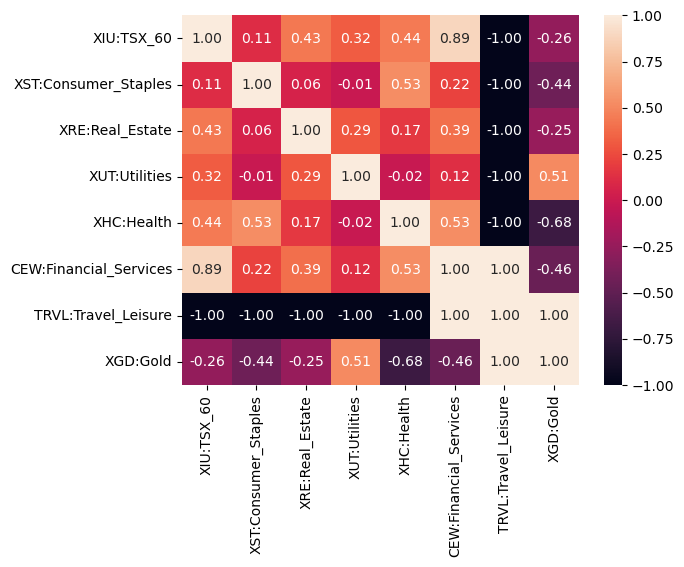

In [202]:
correlation_etf_returns = annual_returns.corr()
sns.heatmap(correlation_etf_returns,annot=True,fmt='.2f')

In [203]:
combined_etf_inflation_df = pd.concat([annual_returns,cpi_annual_df[['CPI_COMMON']]], join = 'inner', axis =1)
combined_etf_inflation_df

,XIU:TSX_60,XST:Consumer_Staples,XRE:Real_Estate,XUT:Utilities,XHC:Health,CEW:Financial_Services,TRVL:Travel_Leisure,XGD:Gold,CPI_COMMON
Year,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.27
2011,6.01,NaN,17.11,NaN,NaN,2.84,NaN,6.15,1.78
2012,-6.91,10.76,12.00,-0.20,11.95,-5.62,NaN,-16.28,1.78
2013,6.07,25.94,-3.22,-4.29,28.29,22.34,NaN,-38.44,1.27
2014,15.53,24.96,0.56,2.36,23.30,17.69,NaN,-13.25,1.48
2015,-1.38,31.95,-1.09,0.80,16.73,-0.78,NaN,-15.15,1.90
2016,-0.85,11.93,-0.67,5.48,-6.57,4.25,NaN,43.06,1.70
2017,10.44,3.45,2.03,6.84,9.41,18.69,NaN,-4.61,1.25
2018,1.43,-0.09,4.93,-8.39,7.87,1.02,NaN,-11.86,1.78


,XIU:TSX_60,XST:Consumer_Staples,XRE:Real_Estate,XUT:Utilities,XHC:Health,CEW:Financial_Services,TRVL:Travel_Leisure,XGD:Gold,CPI_COMMON
XHC:Health,0.444032,0.526874,0.171181,-0.021942,1.000000,0.528819,-1.0,-0.684197,-0.450510
CEW:Financial_Services,0.885737,0.218012,0.390815,0.118366,0.528819,1.000000,1.0,-0.460222,-0.217001
TRVL:Travel_Leisure,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.0,1.000000,-1.000000
XGD:Gold,-0.261003,-0.437194,-0.249762,0.509961,-0.684197,-0.460222,1.0,1.000000,0.010988
CPI_COMMON,-0.104941,-0.111754,-0.269279,-0.341431,-0.450510,-0.217001,-1.0,0.010988,1.000000


<Axes: >

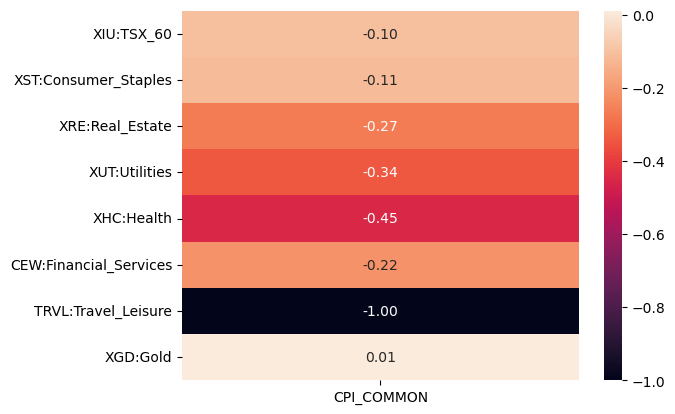

In [204]:
correlation_df = combined_etf_inflation_df.corr()
display(correlation_df.tail())
sns.heatmap(correlation_df.iloc[:-1,-1:],annot=True,fmt='.2f')